In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import concurrent.futures

c:\git\hackathon\hackathon2023\image-segmenation-notebook\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

c:\git\hackathon\hackathon2023\image-segmenation-notebook\Lib\site-packages\transformers\models\segformer\image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [3]:
# url = "https://lh3.googleusercontent.com/pw/AIL4fc_SQq1OpK_TLxLVb_2UDkjT6DjB7f1unVdDCPZKLdAAXlYxQqX-MXrhI4wrX8pOh_5nKFu0wkW97bAwbbPnXkx9EgOUDmCK0ZVeQ1SfTWghjwSNTjK9dKmh8bnoFS3vc3JzTb5dyBGbHj0fLjD6h50hgLSBIsnrzlupN_vRhEdbJLWXEigYn3wBTQ6nehOZ1el8TVPRrjlDIs98fPzZI3paU_y7d3ZOtYo0F25ptB3SVNDmCeSOXYg-e45A9K97WyAuQ-UM7tubWwP4E7BO2wszjnSsE9DqXjkzgz1Tq6sXqSt5mgli3kYdwmPXq7JTvCREVpFQLzO_OuckNlGPIN9QsVlLt9uIVj5b2ChScHYjwMxQwhTPZYYxQosvp39guyu7QqLRW3w1aJ1UZfgJcCJEKpBkl0YOPC69K7kVZH4nukcFTHgo2VMSC46njz_8BmDpyfPOZmCxpKz6csDRPUAq4fG2DNSq427EuGHYD266tl9GkT4QezVMMxmk2IyDDJTiiLJuvZV5eO61oOTQBXnyK9R-jHfAbwcnXJZEB4vJwCU3sGEY2dUSH8xZKqSH_Qa73yC_iXPksCc-IL6ZcmJ8RE-8zWvFl6T90DhinhoNi6-MswYXaXgtApkazLYKwm4SQ3vhHQa8FPQcIp9ONEkYcXCXGKWaE2gKteEPk63jbDAAB6JdS5jDzPbUYSZny8YUjY7O1RNBhY-6QDCqHdojmDmZC4wbaFy4uds99dCuMhfZZTwdqx9hT-c5lIKca6s5je10f58xhOb0OEVEZU9Bk_VjsFVoBYU_CXTffPzUAnw7WgbqLaVZRFf2ADm6cZ6gAmXDFHN3Oe_bVyg2gO6cPxC--HUe_POIUXEBosan4b9Wfzh_SjHCVosAtYL00LGtoNbLDMXfz-5lfrZebAi_iw=w990-h1315-s-no?authuser=0"
# url = 'https://lh3.googleusercontent.com/pw/AIL4fc9899mig1GiaW7UsfeQ48M0F0hKXzg1je76lHcBP2o1HWB9mJ1_2IXzwoa5ap5L7cfq_164OfXuQCT1Jc6EhuC1yPGYG_BbNatvgPcKQSEXC-aI5VbWtco1nisVqJFVSNUSBMzX9wyQVUKNRhTX5v_Qk5RvxKF7yoyaBaOIQzoKbKfUi9v2rwiHFsWTFSvGMOqHOgUJSY7Cx4q6rlSfvW3_2Fc4ryiSt5KuP1U8oZdLvuhQCNPH5tTjye8u5gN3KsGf4t99GKZIikwXEHy8uMA0z4qGLBM7DxPzPERIEuKNRrkxh58dzBekZVCy4PjYVZC4MjlnQfbPjLFcdjcgczqM5epnkOkP63JuM29ZBbh08fvCQMySmV5tRjNspYRzdA1A5eEzAP-eid37x57OHp0jlR0dBx2be2evEwGw754BqHRJxJr9rJcNjjyEirz-y02SBGaby7ZatUwBiN7nmz54o2xralLfRJlDpCfJ98qvSbHYuNfpxB-xWHG1yKVjS90VP4xY3cEdTrgfqb0znEA_1KfQHYVQDY5KHnU42jCYuC_iHq43FmBecaR2_QJR3Fu4daKAYJWAltPGA3P69slZJKjdrbTRsz7aWJQMb2PwL1wWV2fSOjHVP8od5GyLPg1AVsLMbRuUvk8w5s-V5UxpTu1JCLv2rhZW3NU1lYZuqfoj_Zm8B84yArKFJGFuaHNOn9YLHYRK0VE0EDtHboNFAgUrejssL15Iv9w4t3bvcmIFcPKNhybABNdPTXZ-_p_7W3jp1wexrpBeZjghSjAPwJOM4ouZ0mj6exaQdLhYGdl5Ybk9WGxp_nmFQIugTFd7JdBzCMeO6GOVKbDx54DfRp8DQxKoLVVMJHkY8OIi56FB-oN6fvmPwS6j5E2vRaBk32jG6V7a-5e9krVwdPMMjw=w986-h1315-s-no?authuser=0'
# url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
url = "C:\\Users\\ilankhirin\\Downloads\\png2jpg\\ilan-example.jpg"
url = "C:\\Users\\ilankhirin\\Downloads\\png2jpg\\yehuda-example.jpg"
url = "C:\\Users\\ilankhirin\\Downloads\\yehuda-big.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(url)

In [4]:
inputs = processor(images=image, return_tensors="pt")
print(f'inputs {inputs.pixel_values.shape}')
outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

print(f'upsampled_logits {upsampled_logits.shape}')

pred_seg = upsampled_logits.argmax(dim=1)[0]
print(pred_seg.shape)
print(f'pred_seg {pred_seg.shape}')



inputs torch.Size([1, 3, 512, 512])
upsampled_logits torch.Size([1, 18, 3590, 2427])
torch.Size([3590, 2427])
pred_seg torch.Size([3590, 2427])


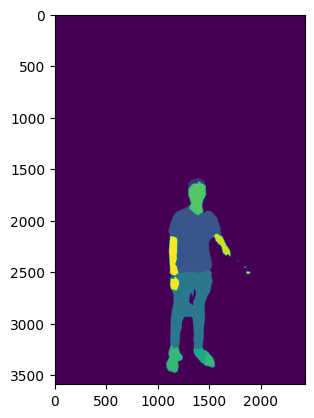

In [5]:
plt.imshow(pred_seg)

<class 'torch.Tensor'>
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])


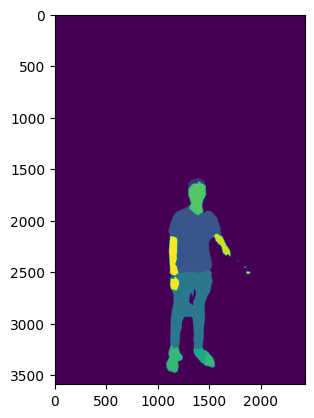

In [6]:
# Create segmentation array
# Image object should be of type PIL.Image
# Returns torch.Tensor
# 0 - Background
# 1 - Hat
# 2 - Hair
# 3 - Sunglasses
# 4 - Upper-clothes
# 5 - Skirt
# 6 - Pants
# 7 - Dress
# 8 - Belt
# 9 - Left-shoe
# 10 - Right-shoe
# 11 - Face
# 12 - Left-leg
# 13 - Right-leg
# 14 - Left-arm
# 15 - Right-arm
# 16 - Bag
# 17 - Scarf
def get_segmentation_array(img):
    inputs = processor(images=img, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits.cpu()

    upsampled_logits = nn.functional.interpolate(
        logits,
        size=image.size[::-1],
        mode="bilinear",
        align_corners=False,
    )

    pred_seg = upsampled_logits.argmax(dim=1)[0]
    print(type(pred_seg))
    return pred_seg

# url = "C:\\Users\\ilankhirin\\Downloads\\tuxedoBlack3-main.jpg"
# url = "C:\\Users\\ilankhirin\\Downloads\\istockphoto-155131149-612x612.jpg"
# url = "C:\\Users\\ilankhirin\\Downloads\\322984081_max.jpg"
# url = "C:\\Users\\ilankhirin\\Downloads\\yehuda-bug3.jpg"
url = "C:\\Users\\ilankhirin\\Downloads\\yehuda-big.jpg"
image = Image.open(url)
pred_seg = get_segmentation_array(image)
plt.imshow(pred_seg)

print(pred_seg[800][1250:1350])

[{'label': 'shirt', 'x': 1103, 'y': 1863, 'w': 513, 'h': 706}, {'label': 'pants', 'x': 1120, 'y': 2484, 'w': 408, 'h': 764}, {'label': 'shoes', 'x': 1082, 'y': 3166, 'w': 470, 'h': 314}, {'label': 'upper_clothing', 'x': 1103, 'y': 1863, 'w': 513, 'h': 706}, {'label': 'left_shoe', 'x': 1106, 'y': 3227, 'w': 446, 'h': 205}, {'label': 'right_shoe', 'x': 1082, 'y': 3166, 'w': 468, 'h': 314}]


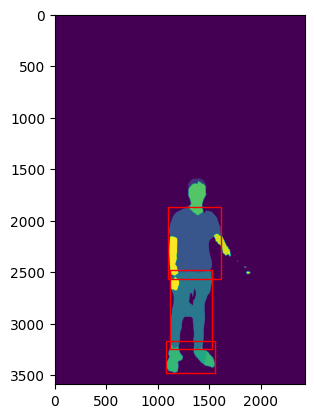

In [7]:
# Given a matrix of segmentation values, return the bounding box of the shirt
# Returns a tuple of (upper_x, upper_y, width, height)
def get_bbox_for_label(seg_matrix_numpy, labels, label_name):
    mask = seg_matrix_numpy == labels[0]
    for label in labels[1:]:
        mask = mask | (seg_matrix_numpy == label)
    indices = np.argwhere(mask)
    if(len(indices) == 0):
        return None
    x_min = np.min(indices[:, 1]).item()
    x_max = np.max(indices[:, 1]).item()
    y_min = np.min(indices[:, 0]).item()
    y_max = np.max(indices[:, 0]).item()
    width = abs(x_max - x_min)
    height = abs(y_max - y_min)
    return {
        'label': label_name,
        'x': x_min,
        'y': y_min,
        'w': width,
        'h': height
    }

def get_clothing_boxes(seg_matrix_numpy):
    shirt_label = 4
    pants_label = 6
    dress_label = 7
    hat_label = 1
    belt_label = 8
    left_shoe_label = 9
    right_shoe_label = 10
    shirt_box = get_bbox_for_label(seg_matrix_numpy, [shirt_label], 'shirt')
    pants_box = get_bbox_for_label(seg_matrix_numpy, [pants_label], 'pants')
    dress_box = get_bbox_for_label(seg_matrix_numpy, [dress_label], 'dress')
    hat_box = get_bbox_for_label(seg_matrix_numpy, [hat_label], 'hat')
    belt_box = get_bbox_for_label(seg_matrix_numpy, [belt_label], 'belt')
    shoes_box = get_bbox_for_label(seg_matrix_numpy, [left_shoe_label, right_shoe_label], 'shoes')
    left_shoe_box = get_bbox_for_label(seg_matrix_numpy, [left_shoe_label], 'left_shoe')
    right_shoe_box = get_bbox_for_label(seg_matrix_numpy, [right_shoe_label], 'right_shoe')
    upper_clothing_box = get_bbox_for_label(seg_matrix_numpy, [dress_label, shirt_label], 'upper_clothing')

    if(dress_box is not None and shirt_box is not None):
        dress_area = dress_box['w'] * dress_box['h']
        shirt_area = shirt_box['w'] * shirt_box['h']
        if(dress_area > shirt_area):
            shirt_box = None        
        else:
            dress_box = None

    return list(filter(lambda x: x is not None, 
        [shirt_box, pants_box, dress_box, hat_box, belt_box, shoes_box, upper_clothing_box, left_shoe_box, right_shoe_box]))

boxes = get_clothing_boxes(pred_seg.numpy())
print(boxes)
shirt = list(filter(lambda x: x['label'] == 'shirt', boxes))
shirt = shirt[0] if len(shirt) > 0 else None
pants = list(filter(lambda x: x['label'] == 'pants', boxes))
pants = pants[0] if len(pants) > 0 else None
dress = list(filter(lambda x: x['label'] == 'dress', boxes))
dress = dress[0] if len(dress) > 0 else None
hat = list(filter(lambda x: x['label'] == 'hat', boxes))
hat = hat[0] if len(hat) > 0 else None
belt = list(filter(lambda x: x['label'] == 'belt', boxes))
belt = belt[0] if len(belt) > 0 else None
shoes = list(filter(lambda x: x['label'] == 'shoes', boxes))
shoes = shoes[0] if len(shoes) > 0 else None
plt.imshow(pred_seg)
if(shirt is not None):
    plt.gca().add_patch(plt.Rectangle((shirt['x'], shirt['y']), shirt['w'], shirt['h'], fill=False, color='red'))
if(pants is not None):
    plt.gca().add_patch(plt.Rectangle((pants['x'], pants['y']), pants['w'], pants['h'], fill=False, color='red'))
if(dress is not None):
    plt.gca().add_patch(plt.Rectangle((dress['x'], dress['y']), dress['w'], dress['h'], fill=False, color='red'))
if(hat is not None):
    plt.gca().add_patch(plt.Rectangle((hat['x'], hat['y']), hat['w'], hat['h'], fill=False, color='red'))
if(belt is not None):
    plt.gca().add_patch(plt.Rectangle((belt['x'], belt['y']), belt['w'], belt['h'], fill=False, color='red'))
if(shoes is not None):
    plt.gca().add_patch(plt.Rectangle((shoes['x'], shoes['y']), shoes['w'], shoes['h'], fill=False, color='red'))

plt.show()

In [8]:
def first(iterable, condition = lambda x: True):
    items = list(filter(condition, boxes))
    return items[0] if len(items) > 0 else None

In [9]:
caption_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


In [26]:

def get_caption(cropped_image, prompt, preprocessed_image=None):
    if(cropped_image is None):
        return None
    inputs = caption_processor(cropped_image, prompt, return_tensors="pt") if preprocessed_image is None else preprocessed_image
    out = caption_model.generate(**inputs)
    text = caption_processor.decode(out[0], skip_special_tokens=True)
    return text

def get_cropped_image(image, boxes, label, show=False):
    box = first(boxes, lambda x: x['label'] == label)
    if(box is None):
        return None
    cropped_image = image.crop((box['x'], box['y'], box['x'] + box['w'], box['y'] + box['h']))
    if(show):
        plt.imshow(cropped_image)
        plt.show()
    return cropped_image


def get_captions(boxes, image, show=True):
    if(show):
        plt.imshow(image)
        plt.show()
    cropped_left_shoe = get_cropped_image(image, boxes, 'left_shoe', show)
    cropped_right_shoe = get_cropped_image(image, boxes, 'right_shoe', show)
    cropped_upper_clothing = get_cropped_image(image, boxes, 'upper_clothing', show)
    cropped_pants = get_cropped_image(image, boxes, 'pants', show)
    cropped_hat = get_cropped_image(image, boxes, 'hat', show)
    cropped_belt = get_cropped_image(image, boxes, 'belt', show)
    captions = [
        get_caption(cropped_left_shoe, 'shoe color is '),
        get_caption(cropped_left_shoe, ''),
        get_caption(cropped_right_shoe, 'shoe color is '),
        get_caption(cropped_right_shoe, ''),
        get_caption(cropped_upper_clothing, 'Upper clothing color is '),
        get_caption(cropped_upper_clothing, ''),
        get_caption(cropped_pants, 'Pants color is '),
        get_caption(cropped_pants, ''),
        get_caption(cropped_hat, 'Ignore background. Hat color is '),
        get_caption(cropped_hat, ''),
        get_caption(cropped_belt, 'Belt color is '),
        get_caption(cropped_belt, '')
    ]

    return list(filter(lambda x: x is not None, captions))

def get_captions_in_parallel(boxes, image, cropping_plan={}, show=False):
    if(show):
        plt.imshow(image)
        plt.show()
    
    caption_tasks = []
    for key in cropping_plan.keys():
        cropped_image = get_cropped_image(image, boxes, key, show)
        for prompt in cropping_plan[key]['prompts']:
            caption_tasks.append((cropped_image, prompt))

    captions = []

    # Use ThreadPoolExecutor to run caption tasks in parallel
    with concurrent.futures.ThreadPoolExecutor() as executor:
        caption_results = [executor.submit(get_caption, cropped_image, prompt) for cropped_image, prompt in caption_tasks]
    
    # Retrieve the results from the caption tasks
    for result in concurrent.futures.as_completed(caption_results):
        caption = result.result()
        if caption is not None:
            captions.append(caption)

    return captions
    
# captions = get_captions(boxes, image)
captions = get_captions_in_parallel(boxes, image, {'upper_clothing': {'prompts': ['Upper clothing colors']}})

print(captions)

['upper clothing colors are pink, white, and blue']


In [23]:
a = []
a.append(1)
a


[1]